***
# NBA Game Prediction Models ⛹
Authors:
* Parth Shukla
* Matthew Saxsma

Date:
* 04-01-2025

***
## __Libraries__

In [52]:
import pandas as pd
import os
import numpy as np
import pandas as pda
import missingno as msno
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets 
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# __Path__

In [53]:
# Notbook path
notebook_directory = os.getcwd()
print(f'Current notebook directory: {notebook_directory}')

Current notebook directory: c:\Users\Matth\Desktop\repos\CollabProject


# __Dataset 1__: `TeamStatistics.csv`
* Data from all NBA games.
* From 1946.

In [54]:
# dataset - https://www.kaggle.com/datasets/eoinamoore/historical-nba-data-and-player-box-scores/
games_big_data_path = os.path.join(notebook_directory,'data','TeamStatistics.csv')
df_games_big = pd.read_csv(games_big_data_path)
np.shape(df_games_big)

(142836, 48)

In [55]:
df_games_big.sample(7) # quick look at the data

gameId             gameDate    teamCity   teamName      teamId  \
127521  27000090  1970-11-05 19:00:00     Detroit    Pistons  1610612765   
136482  26000085  1960-12-03 19:00:00    New York     Knicks  1610612752   
14113   21900420  2019-12-20 19:00:00     Memphis  Grizzlies  1610612763   
88984   29000700  1991-02-22 20:00:00     Detroit    Pistons  1610612765   
70052   29800492  1999-04-07 20:30:00     Chicago      Bulls  1610612741   
90987   28900886  1990-03-21 20:00:00  Washington    Bullets  1610612764   
32559   21201003  2013-03-18 22:30:00        Utah       Jazz  1610612762   

       opponentTeamCity opponentTeamName  opponentTeamId  home  win  ...  \
127521          Buffalo           Braves      1610612746     1    1  ...   
136482         Syracuse        Nationals      1610612755     0    0  ...   
14113         Cleveland        Cavaliers      1610612739     0    0  ...   
88984         Charlotte          Hornets      1610612766     0    0  ...   
70052           Indiana           Pacers      1610612754     1    0  ...   
90987        New Jersey             Nets      1610612751     1    1  ...   
32559          New York           Knicks      1610612752     1    0  ...   

        leadChanges  pointsFastBreak  pointsFromTurnovers  pointsInThePaint  \
127521          NaN              NaN                  NaN               NaN   
136482          NaN              NaN                  NaN               NaN   
14113           NaN              NaN                  NaN               NaN   
88984           NaN              NaN                  NaN               NaN   
70052           NaN              NaN                  NaN               NaN   
90987           NaN              NaN                  NaN               NaN   
32559           NaN              NaN                  NaN               NaN   

        pointsSecondChance  timesTied  timeoutsRemaining  seasonWins  \
127521                 NaN        NaN                NaN         NaN   
136482                 NaN        NaN                NaN         NaN   
14113                  NaN        NaN                NaN         NaN   
88984                  NaN        NaN                NaN         NaN   
70052                  NaN        NaN                NaN         NaN   
90987                  NaN        NaN                NaN         NaN   
32559                  NaN        NaN                NaN         NaN   

        seasonLosses  coachId  
127521           NaN      NaN  
136482           NaN      NaN  
14113            NaN      NaN  
88984            NaN      NaN  
70052            NaN      NaN  
90987            NaN      NaN  
32559            NaN      NaN  

[7 rows x 48 columns]

In [56]:
df_games_big.coachId.unique() # nothing in coach id column. We'll get rid of it.
df_games_big = df_games_big.drop(columns=['coachId'])

In [57]:
# checking what is redundant across rows of same game
df_games_big.loc[2240:2241,].T # we should check for NaNs

2240                 2241
gameId                              22301095             22301095
gameDate                 2024-04-02 19:00:00  2024-04-02 19:00:00
teamCity                           Milwaukee           Washington
teamName                               Bucks              Wizards
teamId                            1610612749           1610612764
opponentTeamCity                  Washington            Milwaukee
opponentTeamName                     Wizards                Bucks
opponentTeamId                    1610612764           1610612749
home                                       0                    1
win                                        0                    1
teamScore                                113                  117
opponentScore                            117                  113
assists                                 31.0                 26.0
blocks                                   6.0                  2.0
steals                                   8.0                  9.0
fieldGoalsAttempted                    103.0                 93.0
fieldGoalsMade                          45.0                 47.0
fieldGoalsPercentage                   0.437                0.505
threePointersAttempted                  48.0                 38.0
threePointersMade                       11.0                  9.0
threePointersPercentage                0.229                0.237
freeThrowsAttempted                     18.0                 17.0
freeThrowsMade                          12.0                 14.0
freeThrowsPercentage                   0.667                0.824
reboundsDefensive                       39.0                 39.0
reboundsOffensive                       18.0                  5.0
reboundsTotal                           57.0                 44.0
foulsPersonal                           17.0                 20.0
turnovers                               12.0                 11.0
plusMinusPoints                         -4.0                  4.0
numMinutes                             240.0                240.0
q1Points                                 NaN                  NaN
q2Points                                 NaN                  NaN
q3Points                                 NaN                  NaN
q4Points                                 NaN                  NaN
benchPoints                              NaN                  NaN
biggestLead                              NaN                  NaN
biggestScoringRun                        NaN                  NaN
leadChanges                              NaN                  NaN
pointsFastBreak                          NaN                  NaN
pointsFromTurnovers                      NaN                  NaN
pointsInThePaint                         NaN                  NaN
pointsSecondChance                       NaN                  NaN
timesTied                                NaN                  NaN
timeoutsRemaining                        NaN                  NaN
seasonWins                               NaN                  NaN
seasonLosses                             NaN                  NaN

Missingness of df_teams

In [58]:
# missing percentage per column
cols_without_missing = []
for col in df_games_big.columns:
    missing_percent = df_games_big[col].isna().sum()/len(df_games_big)
    if missing_percent > 0.30: # if more than 30% of the column is missing, we want to drop it
        cols_without_missing.append(False)
    else: 
        cols_without_missing.append(True)

# removing the columns with too many missing values
df_games_big = df_games_big[df_games_big.columns[cols_without_missing]]

# __Dataset 2__: `Games.csv`
* This data also contains information on every NBA game. 
* Each row is a game, which specifies the home and away teams
* This is different than the previous dataset, which has two rows for each game.

In [59]:
games_small_data_path = os.path.join(notebook_directory,'data','Games.csv')
df_games_small = pd.read_csv(games_small_data_path)
np.shape(df_games_small)

C:\Users\Matth\AppData\Local\Temp\ipykernel_16772\4217729876.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games_small = pd.read_csv(games_small_data_path)


(71418, 17)

In [60]:
df_games_small.sample(7)

gameId             gameDate hometeamCity  hometeamName  hometeamId  \
17905  21100560  2012-03-05 20:00:00    Minnesota  Timberwolves  1610612750   
50557  48400113  1985-04-24 19:00:00      Chicago         Bulls  1610612741   
27297  20401036  2005-03-27 20:00:00      Seattle   SuperSonics  1610612760   
22166  20800487  2009-01-02 22:30:00  Los Angeles        Lakers  1610612747   
4246   22100775  2022-02-02 19:30:00       Boston       Celtics  1610612738   
41655  29300008  1993-11-05 20:00:00  Los Angeles      Clippers  1610612746   
57674  27700704  1978-03-07 20:00:00       Denver       Nuggets  1610612743   

      awayteamCity   awayteamName  awayteamId  homeScore  awayScore  \
17905  Los Angeles       Clippers  1610612746         95         94   
50557    Milwaukee          Bucks  1610612749        109        107   
27297   Washington        Wizards  1610612764         94         95   
22166         Utah           Jazz  1610612762        113        100   
4246     Charlotte        Hornets  1610612766        113        107   
41655     Portland  Trail Blazers  1610612757         97         95   
57674      Phoenix           Suns  1610612756        112        126   

           winner        gameType  attendance  arenaId           gameLabel  \
17905  1610612750  Regular Season     19509.0       61                 NaN   
50557  1610612741        Playoffs         NaN        0  East - First Round   
27297  1610612764  Regular Season     16333.0       72                 NaN   
22166  1610612747  Regular Season     18997.0      137                 NaN   
4246   1610612738  Regular Season     19156.0       17                 NaN   
41655  1610612746  Regular Season     11246.0      100                 NaN   
57674  1610612756  Regular Season     17428.0       36                 NaN   

      gameSubLabel  seriesGameNumber  
17905          NaN               NaN  
50557          NaN               3.0  
27297          NaN               NaN  
22166          NaN               NaN  
4246           NaN               NaN  
41655          NaN               NaN  
57674          NaN               NaN

# Consolidating Datasets 1 and 2
* Dataset 1: `TeamStatistics.csv` has 142,836 rows, 2 per game
* Dataset 2: `Games.csv` has 71,418 rows, 1 per game

In [61]:
# both datasets with games have a game ID and a game date
print(f"Shared columns:\n\n\t{df_games_small.columns[df_games_small.columns.isin(df_games_big.columns)]}\n\n") 

# columns of df_games_big NOT in df_games
print(f"Columns of big df not in smaller:\n\n\t{df_games_big.columns[~df_games_big.columns.isin(df_games_small.columns)]}\n\n")

 # columns of df_games NOT in df_games_big
print(f"Columns of small df not in big:\n\n\t{df_games_small.columns[~df_games_small.columns.isin(df_games_big.columns)]}\n\n")

Shared columns:

	Index(['gameId', 'gameDate'], dtype='object')


Columns of big df not in smaller:

	Index(['teamCity', 'teamName', 'teamId', 'opponentTeamCity',
       'opponentTeamName', 'opponentTeamId', 'home', 'win', 'teamScore',
       'opponentScore', 'assists', 'blocks', 'steals', 'fieldGoalsAttempted',
       'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersAttempted',
       'threePointersMade', 'threePointersPercentage', 'freeThrowsAttempted',
       'freeThrowsMade', 'freeThrowsPercentage', 'reboundsDefensive',
       'reboundsOffensive', 'reboundsTotal', 'foulsPersonal', 'turnovers',
       'plusMinusPoints', 'numMinutes'],
      dtype='object')


Columns of small df not in big:

	Index(['hometeamCity', 'hometeamName', 'hometeamId', 'awayteamCity',
       'awayteamName', 'awayteamId', 'homeScore', 'awayScore', 'winner',
       'gameType', 'attendance', 'arenaId', 'gameLabel', 'gameSubLabel',
       'seriesGameNumber'],
      dtype='object')




In [62]:
# subsetting by home teams
df_games_big_home = df_games_big[df_games_big.home == 1]
print(f"Home teams data size: {df_games_big_home.shape}")

# subsetting by away teams
df_games_big_away = df_games_big[df_games_big.home == 0]
print(f"Away teams data size: {df_games_big_away.shape}")

# merging home and away teams dataframes
df_games_wide = df_games_big_home.merge(right=df_games_big_away,how='inner',on='gameId',suffixes=('_home','_away'))
print(f"Combined home and away data size: {df_games_wide.shape}")


Home teams data size: (71418, 31)
Away teams data size: (71418, 31)
Combined home and away data size: (71418, 61)


In [63]:
# merging df_games and home and away teams (df_games_wide) dataframes to make one big df_games dataframe
df_games = df_games_small.merge(right=df_games_wide, how='inner',on='gameId',suffixes=('_small','_wide'))
print(f"Combined data size: {df_games.shape}")
df_games.sample(5) # quick look at the data

Combined data size: (71418, 77)


gameId             gameDate  hometeamCity hometeamName  hometeamId  \
8063   21800790  2019-02-04 19:00:00       Detroit      Pistons  1610612765   
24431  20601046  2007-03-26 19:30:00      New York       Knicks  1610612752   
42706  29200146  1992-11-27 20:00:00  Philadelphia        76ers  1610612755   
39588  29400883  1995-03-22 20:00:00          Utah         Jazz  1610612762   
43842  29100176  1991-11-27 20:00:00          Utah         Jazz  1610612762   

      awayteamCity awayteamName  awayteamId  homeScore  awayScore  ...  \
8063        Denver      Nuggets  1610612743        129        103  ...   
24431      Orlando        Magic  1610612753         89         94  ...   
42706    Milwaukee        Bucks  1610612749        111        115  ...   
39588       Denver      Nuggets  1610612743        103         91  ...   
43842    Charlotte      Hornets  1610612766        113        107  ...   

       freeThrowsAttempted_away freeThrowsMade_away  \
8063                       22.0                12.0   
24431                      21.0                14.0   
42706                      34.0                30.0   
39588                      22.0                16.0   
43842                      16.0                10.0   

       freeThrowsPercentage_away  reboundsDefensive_away  \
8063                       0.545                    22.0   
24431                      0.667                    26.0   
42706                      0.882                    33.0   
39588                      0.727                    23.0   
43842                      0.625                    36.0   

      reboundsOffensive_away reboundsTotal_away  foulsPersonal_away  \
8063                    10.0               32.0                19.0   
24431                    9.0               35.0                27.0   
42706                   12.0               45.0                22.0   
39588                    6.0               29.0                30.0   
43842                   13.0               49.0                19.0   

      turnovers_away plusMinusPoints_away numMinutes_away  
8063            14.0                -26.0           240.0  
24431           20.0                  5.0           240.0  
42706           20.0                  4.0           240.0  
39588           11.0                -12.0           240.0  
43842           13.0                 -6.0           240.0  

[5 rows x 77 columns]

# Cleaning the combined dataset
Need to remove:
> 1. Columns that do not add information
> 2. Columns that are mostly empty
> 3. Rows that are mostly empty

Variable types:
> 1. One-hot encode all categorical variables
> 2. Make sure all numerical types are adequate


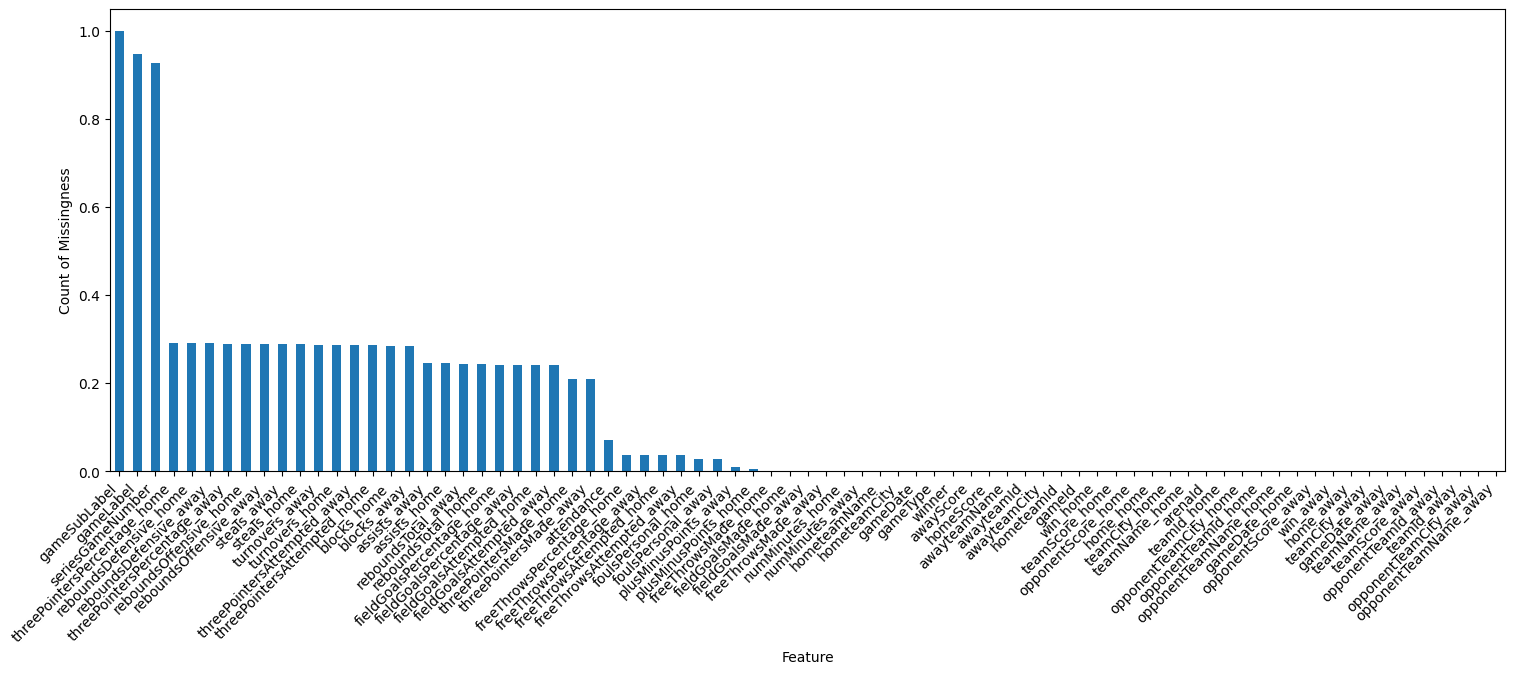

In [64]:
# missingness bar chart
plt.figure(figsize=(18,6))
missing_per_column = df_games.isna().sum().sort_values(ascending=False) / len(df_games)
missing_per_column.plot(kind='bar', xlabel='Feature',ylabel='Count of Missingness')
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()


In [65]:
# relabeling winner Id (doesn't matter if we use home or away names)
df_games['winner']
df_games['hometeamName']
team_id_dict = dict(zip(df_games['hometeamId'].unique(),df_games['hometeamName'].unique()))
df_games['winner'] = df_games['winner'].map(team_id_dict)

In [66]:
# print(df_games.columns.tolist())
# columns that are superfluous or otherwise unneeded
unnecessary = [
    'arenaId',
    "hometeamCity",
    "awayteamCity",
    "hometeamId",
    "awayteamCity",
    "awayteamId",
    "gameDate_home",
    "teamCity_home",
    "teamName_home",
    "teamId_home",
    "opponentTeamCity_home",
    "opponentTeamName_home",
    "opponentTeamId_home",
    "home_home",
    "teamScore_home",
    "opponentScore_home",
    "numMinutes_home",
    "gameDate_away",
    "teamCity_away",
    "teamName_away",
    "teamId_away",
    "opponentTeamCity_away",
    "opponentTeamName_away",
    "opponentTeamId_away",
    "home_away",
    "win_away",
    "teamScore_away",
    "opponentScore_away",
    "numMinutes_away",
]

mostly_missing = ["gameLabel", "gameSubLabel", "seriesGameNumber"]

# changing gameDate to a datetime object
df_games["gameDate"] = pd.to_datetime(df_games["gameDate"])

In [67]:
# dropping the unnecessary columns
df_games.drop(columns=unnecessary,inplace=True)
 
 # dropping the mostly missing columns
df_games.drop(columns=mostly_missing,inplace=True)

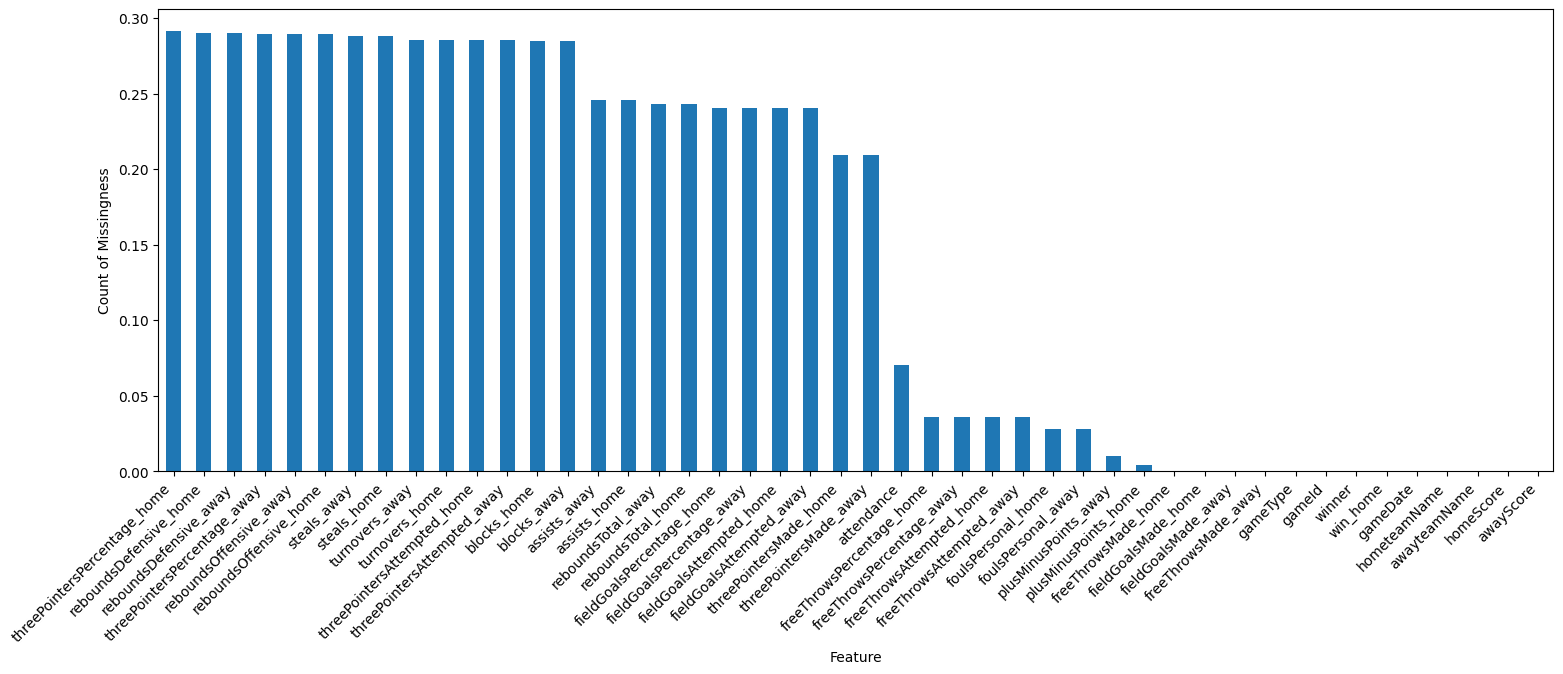

In [68]:
# check missingness bar chart again
# missingness still around 30% for several columns
plt.figure(figsize=(18,6))
missing_per_column = df_games.isna().sum().sort_values(ascending=False) / len(df_games)
missing_per_column.plot(kind='bar', xlabel='Feature',ylabel='Count of Missingness')
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()

<Figure size 1000x100 with 0 Axes>

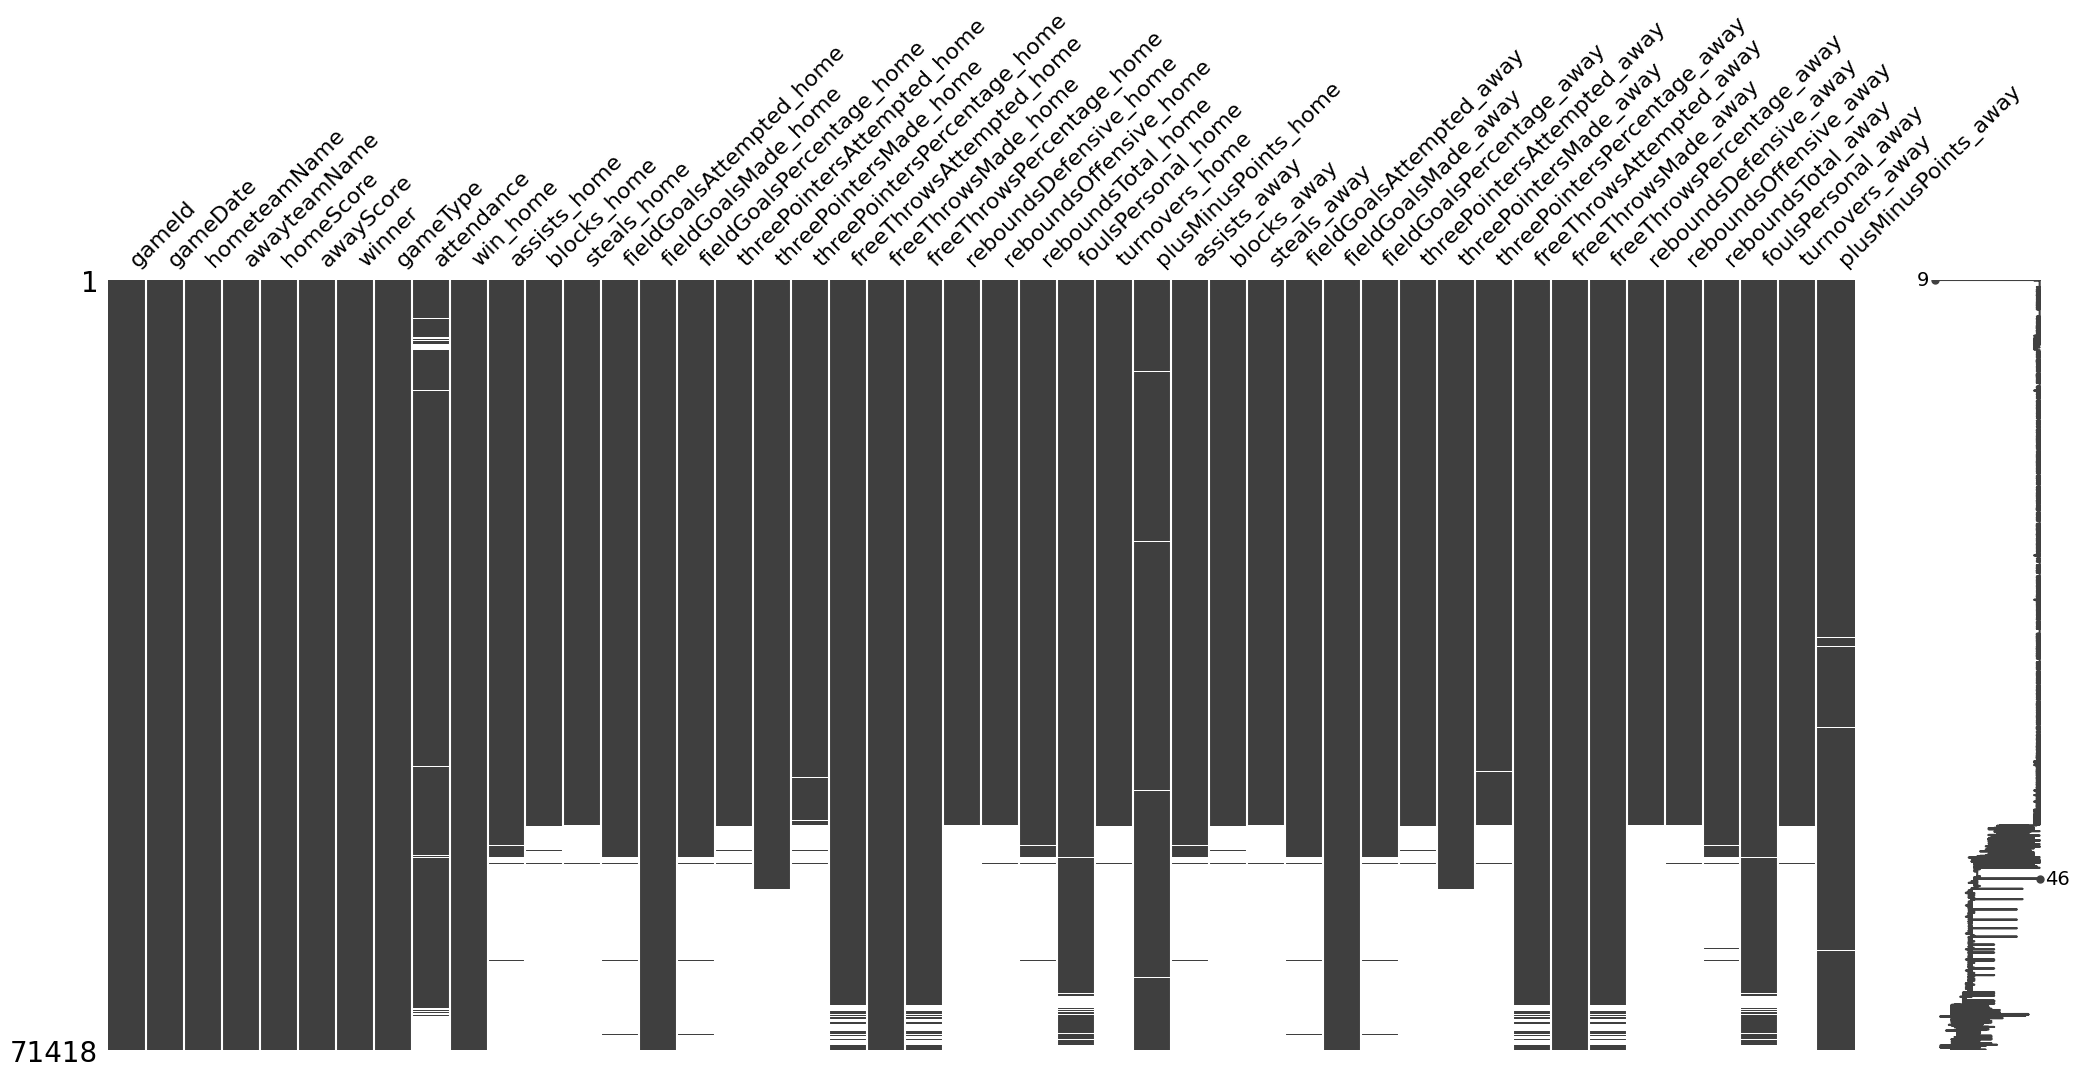

In [69]:
# missingness matrix to determine what rows might have lots of missingness
plt.figure(figsize=(10,1))
msno.matrix(df_games)
plt.show()

In [70]:
# I wrote this for loop to figure out where the rows start to have a lot of missing data
# for i in range(50575,50600):
#     print(f"Index {i}: {df_games.iloc[i].isna().sum() / df_games.shape[1]}")
print(len(df_games.iloc[0:50581])) # need to include 50,580 and exclude 50,581
print(df_games.iloc[50580].isna().sum() / df_games.shape[1])

50581
0.021739130434782608


In [71]:
# removing the largely missing rows
df_games = df_games.iloc[0:50581]
df_games.sample(4)

gameId            gameDate hometeamName awayteamName  homeScore  \
4283   22100738 2022-01-28 20:00:00         Heat     Clippers        121   
8474   21800382 2018-12-08 19:30:00       Knicks         Nets        104   
14186  21400248 2014-11-30 21:30:00       Lakers      Raptors        129   
25717  20501189 2006-04-15 19:30:00      Bobcats       Pacers         92   

       awayScore   winner        gameType  attendance  win_home  ...  \
4283         114     Heat  Regular Season     19600.0         1  ...   
8474         112     Nets  Regular Season     18662.0         0  ...   
14186        122   Lakers  Regular Season     18997.0         1  ...   
25717         91  Hornets  Regular Season     17384.0         1  ...   

       threePointersPercentage_away  freeThrowsAttempted_away  \
4283                          0.257                      32.0   
8474                          0.500                      25.0   
14186                         0.265                      31.0   
25717                         0.182                      25.0   

       freeThrowsMade_away  freeThrowsPercentage_away  reboundsDefensive_away  \
4283                  23.0                      0.719                    28.0   
8474                  15.0                      0.600                    33.0   
14186                 23.0                      0.742                    39.0   
25717                 15.0                      0.600                    42.0   

       reboundsOffensive_away  reboundsTotal_away  foulsPersonal_away  \
4283                      9.0                37.0                21.0   
8474                     12.0                45.0                25.0   
14186                    14.0                53.0                28.0   
25717                     8.0                50.0                18.0   

       turnovers_away  plusMinusPoints_away  
4283             13.0                  -7.0  
8474             16.0                   8.0  
14186             8.0                  -7.0  
25717            18.0                  -1.0  

[4 rows x 46 columns]

<Figure size 1000x100 with 0 Axes>

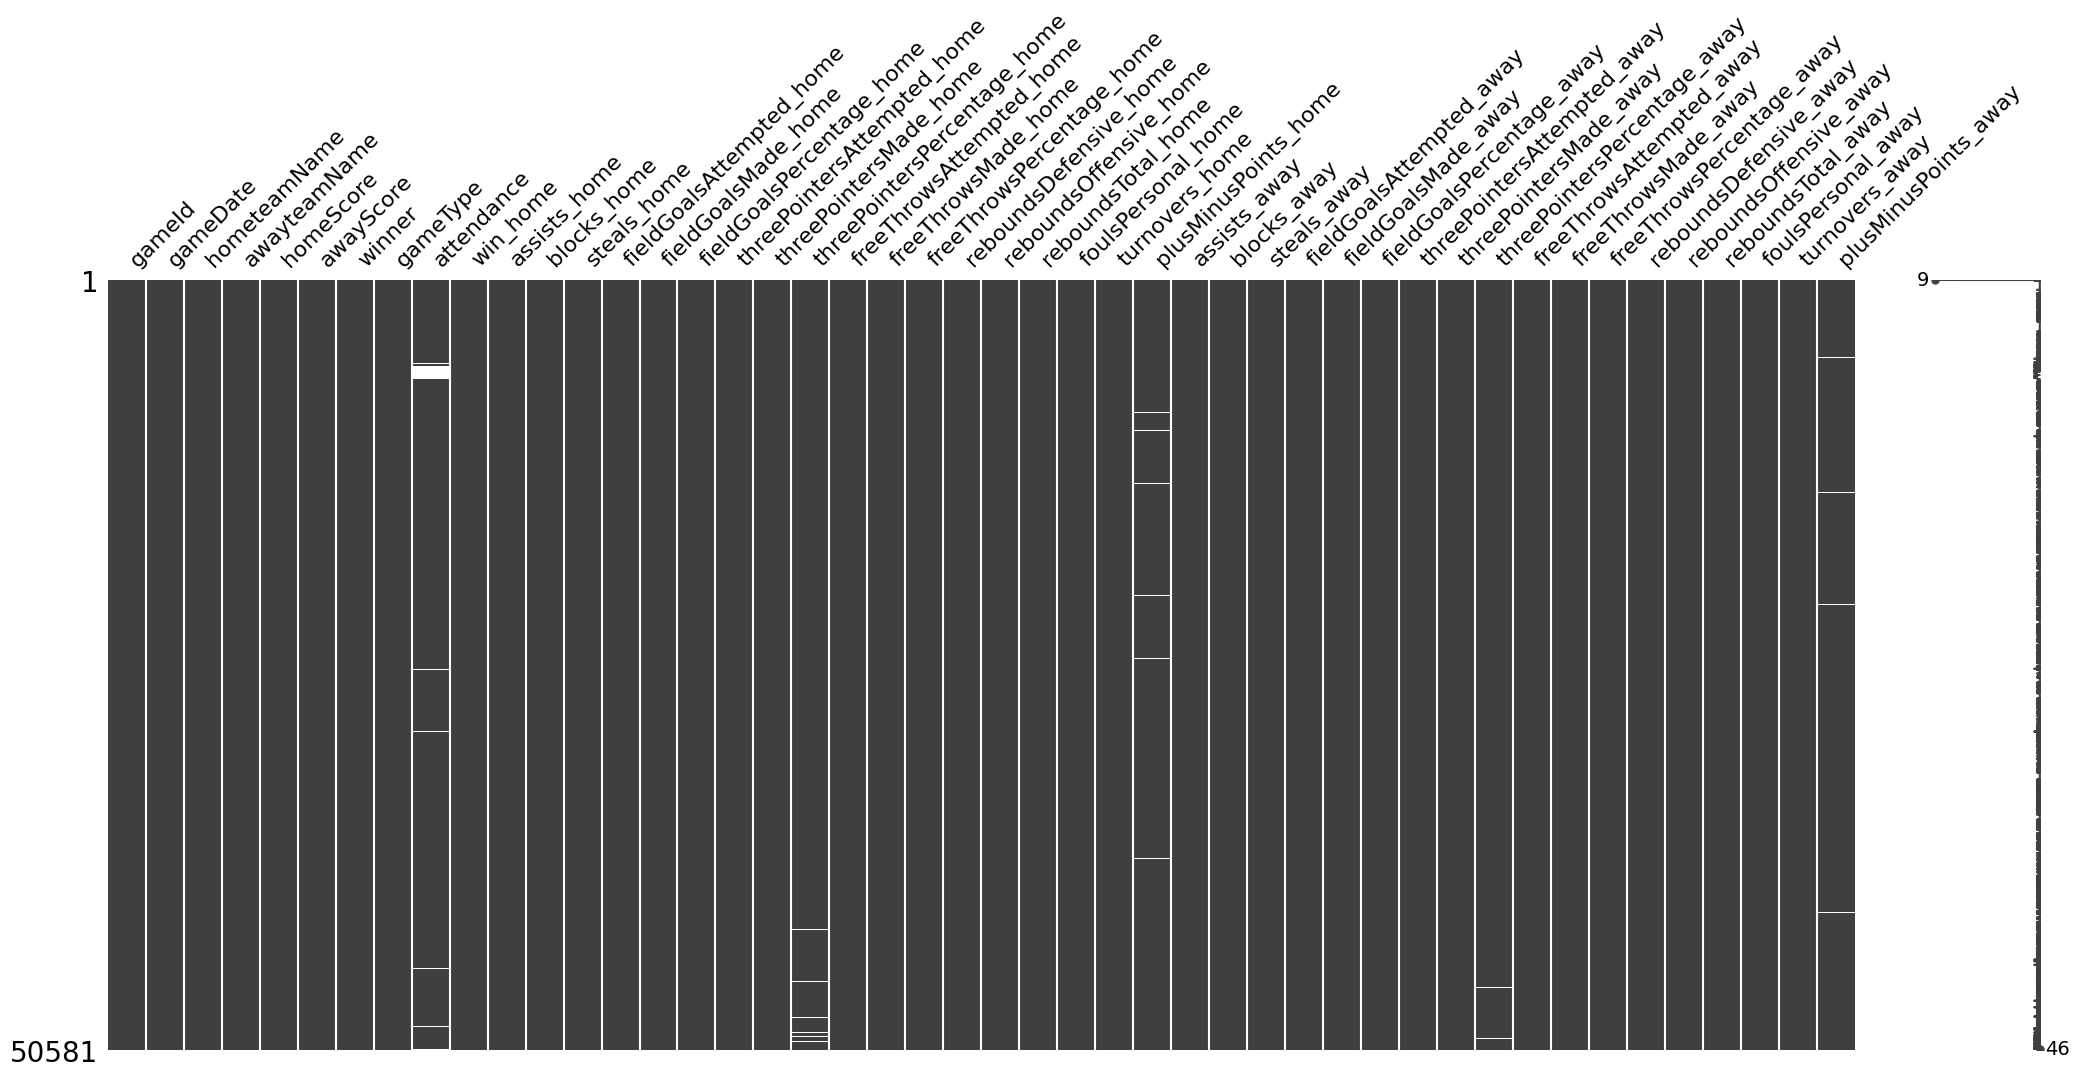

In [72]:
# checking the missingness matrix again to see if the row missingness looks better
# it does look solid
plt.figure(figsize=(10,1))
msno.matrix(df_games)
plt.show()

In [73]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50581 entries, 0 to 50580
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   gameId                        50581 non-null  int64         
 1   gameDate                      50581 non-null  datetime64[ns]
 2   hometeamName                  50581 non-null  object        
 3   awayteamName                  50581 non-null  object        
 4   homeScore                     50581 non-null  int64         
 5   awayScore                     50581 non-null  int64         
 6   winner                        50581 non-null  object        
 7   gameType                      50581 non-null  object        
 8   attendance                    49395 non-null  float64       
 9   win_home                      50581 non-null  int64         
 10  assists_home                  50580 non-null  float64       
 11  blocks_home                 

# __Denoising Autoencoder__

### __Step 1.__ Prepare training data
1. We need to make sure all categorical varialbes are one-hot encoded.
2. Then 'mask' values (replace with 0s?) in corrupted training
3. Add normal/poisson noise to continuous variables (depending on scale)
4. Drop unneeded variables

In [74]:
df_games.drop(columns=['gameId','gameDate'],inplace=True)

Imputation

In [75]:
# Impute missing values with the mean for numerical columns
for col in df_games.columns:
    if df_games[col].isna().sum() > 0:  # Check if the column has missing values
        if df_games[col].dtype in ['float64', 'int64']:  # Only for numerical columns
            df_games[col].fillna(df_games[col].median(), inplace=True)
        if df_games[col].dtype == 'object':
            df_games[col].fillna('Missing', inplace=True)

C:\Users\Matth\AppData\Local\Temp\ipykernel_16772\3076076711.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games[col].fillna(df_games[col].median(), inplace=True)
C:\Users\Matth\AppData\Local\Temp\ipykernel_16772\3076076711.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [76]:
# should show NO columns after imputation
for col in df_games.columns:
    if df_games[col].isna().sum() > 0:  # Check if the column has missing values
        print(f"Column {col} still has missing values after imputation.")

Turning winner into a PyTorch tensor

In [77]:
# creating team to index mapping for use with home team, away team, and winner one-hot encoded feaures
unique_teams = df_games['hometeamName'].unique()
team_to_index = {team: idx for idx, team in enumerate(unique_teams)}
labels_winner = torch.tensor(df_games['winner'].map(team_to_index).values)
one_hot_winner = F.one_hot(labels_winner,num_classes=len(unique_teams)).float()
print(f"One hot winner shape: {one_hot_winner.shape}")
one_hot_winner
# 33 features for 33 unique teams

One hot winner shape: torch.Size([50581, 33])


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

Creating feature names

In [78]:
winner_features = ["winner_" + team for team in df_games['hometeamName'].unique()]
winner_features
# df_games['winner'] = df_games['winner'].map(team_to_index)
# df_games['winner']

['winner_Jazz',
 'winner_Kings',
 'winner_Thunder',
 'winner_Hawks',
 'winner_Pistons',
 'winner_Pacers',
 'winner_76ers',
 'winner_Wizards',
 'winner_Timberwolves',
 'winner_Pelicans',
 'winner_Cavaliers',
 'winner_Magic',
 'winner_Raptors',
 'winner_Bucks',
 'winner_Warriors',
 'winner_Celtics',
 'winner_Trail Blazers',
 'winner_Nuggets',
 'winner_Bulls',
 'winner_Rockets',
 'winner_Spurs',
 'winner_Mavericks',
 'winner_Nets',
 'winner_Knicks',
 'winner_Clippers',
 'winner_Suns',
 'winner_Lakers',
 'winner_Heat',
 'winner_Grizzlies',
 'winner_Hornets',
 'winner_Bobcats',
 'winner_SuperSonics',
 'winner_Bullets']

Turning hometeamName into a PyTorch tensor

In [79]:
unique_teams = df_games['hometeamName'].unique()
team_to_index = {team: idx for idx, team in enumerate(unique_teams)}
labels_hometeam = torch.tensor(df_games['hometeamName'].map(team_to_index).values)
one_hot_hometeam = F.one_hot(labels_hometeam, num_classes=len(unique_teams)).float()
print(one_hot_hometeam.shape)
one_hot_hometeam

# tensor has a column for each team (index 0 to 32) and the 0th index of the column is 1 if that row is the first team (Jazz)
# 33 home teams

torch.Size([50581, 33])


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [80]:
hometeam_features = ['hometeam_' + key for key in team_to_index.keys()]
hometeam_features

['hometeam_Jazz',
 'hometeam_Kings',
 'hometeam_Thunder',
 'hometeam_Hawks',
 'hometeam_Pistons',
 'hometeam_Pacers',
 'hometeam_76ers',
 'hometeam_Wizards',
 'hometeam_Timberwolves',
 'hometeam_Pelicans',
 'hometeam_Cavaliers',
 'hometeam_Magic',
 'hometeam_Raptors',
 'hometeam_Bucks',
 'hometeam_Warriors',
 'hometeam_Celtics',
 'hometeam_Trail Blazers',
 'hometeam_Nuggets',
 'hometeam_Bulls',
 'hometeam_Rockets',
 'hometeam_Spurs',
 'hometeam_Mavericks',
 'hometeam_Nets',
 'hometeam_Knicks',
 'hometeam_Clippers',
 'hometeam_Suns',
 'hometeam_Lakers',
 'hometeam_Heat',
 'hometeam_Grizzlies',
 'hometeam_Hornets',
 'hometeam_Bobcats',
 'hometeam_SuperSonics',
 'hometeam_Bullets']

Turning awayteamName into a PyTorch tensor

In [81]:
labels_awayteam = torch.tensor(df_games['awayteamName'].map(team_to_index).values)
one_hot_awayteam = F.one_hot(labels_awayteam, num_classes=len(unique_teams)).float()
one_hot_awayteam
# 33 away teams

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [82]:
awayteam_features = ['awayteam_' + key for key in team_to_index.keys()]
awayteam_features

['awayteam_Jazz',
 'awayteam_Kings',
 'awayteam_Thunder',
 'awayteam_Hawks',
 'awayteam_Pistons',
 'awayteam_Pacers',
 'awayteam_76ers',
 'awayteam_Wizards',
 'awayteam_Timberwolves',
 'awayteam_Pelicans',
 'awayteam_Cavaliers',
 'awayteam_Magic',
 'awayteam_Raptors',
 'awayteam_Bucks',
 'awayteam_Warriors',
 'awayteam_Celtics',
 'awayteam_Trail Blazers',
 'awayteam_Nuggets',
 'awayteam_Bulls',
 'awayteam_Rockets',
 'awayteam_Spurs',
 'awayteam_Mavericks',
 'awayteam_Nets',
 'awayteam_Knicks',
 'awayteam_Clippers',
 'awayteam_Suns',
 'awayteam_Lakers',
 'awayteam_Heat',
 'awayteam_Grizzlies',
 'awayteam_Hornets',
 'awayteam_Bobcats',
 'awayteam_SuperSonics',
 'awayteam_Bullets']

Turning gameType into a PyTorch tensor

In [83]:
unique_gametypes = df_games['gameType'].unique()
type_to_index = {gametype: idx for idx, gametype in enumerate(unique_gametypes)}
labels_gametype= torch.tensor(df_games['gameType'].map(type_to_index).values)
one_hot_gametype = F.one_hot(labels_gametype, num_classes=len(unique_gametypes)).float()
one_hot_gametype

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]])

In [84]:
gametype_features = ['gametype_' + key for key in type_to_index.keys()]
gametype_features
# 6 game types

['gametype_Regular Season',
 'gametype_Preseason',
 'gametype_Playoffs',
 'gametype_Play-in Tournament',
 'gametype_NBA Cup',
 'gametype_NBA Emirates Cup']

Turning DataFrame into tensor for PyTorch

In [85]:
# creating tensor
tensor_games = torch.tensor(df_games.drop(columns=['hometeamName','awayteamName','winner','gameType']).values)
tensor_numeric = torch.cat([tensor_games,one_hot_hometeam, one_hot_awayteam,one_hot_winner, one_hot_gametype], axis=1)

In [86]:
# feature names
numeric_features = df_games.drop(columns=['hometeamName','awayteamName','winner','gameType']).columns.tolist()
tensor_features = numeric_features +  hometeam_features + awayteam_features + winner_features + gametype_features
tensor_features = [feat.replace(" ","_") for feat in tensor_features]
tensor_features


['homeScore',
 'awayScore',
 'attendance',
 'win_home',
 'assists_home',
 'blocks_home',
 'steals_home',
 'fieldGoalsAttempted_home',
 'fieldGoalsMade_home',
 'fieldGoalsPercentage_home',
 'threePointersAttempted_home',
 'threePointersMade_home',
 'threePointersPercentage_home',
 'freeThrowsAttempted_home',
 'freeThrowsMade_home',
 'freeThrowsPercentage_home',
 'reboundsDefensive_home',
 'reboundsOffensive_home',
 'reboundsTotal_home',
 'foulsPersonal_home',
 'turnovers_home',
 'plusMinusPoints_home',
 'assists_away',
 'blocks_away',
 'steals_away',
 'fieldGoalsAttempted_away',
 'fieldGoalsMade_away',
 'fieldGoalsPercentage_away',
 'threePointersAttempted_away',
 'threePointersMade_away',
 'threePointersPercentage_away',
 'freeThrowsAttempted_away',
 'freeThrowsMade_away',
 'freeThrowsPercentage_away',
 'reboundsDefensive_away',
 'reboundsOffensive_away',
 'reboundsTotal_away',
 'foulsPersonal_away',
 'turnovers_away',
 'plusMinusPoints_away',
 'hometeam_Jazz',
 'hometeam_Kings',
 'hom

In [87]:
tensor_numeric.shape

torch.Size([50581, 145])

### __Step 2.__ Build Model Architecture

In [88]:
class ae(nn.Module):
    def __init__(self):
        super().__init__() # specifies to run parent torch.nn.Module class __init__ method automatically when I initialize the child 'dae' class I'm making.
        # Encoding layers
        self.encoder = nn.Sequential(
            nn.Linear(145,24), nn.ReLU(),nn.Linear(24, 12), nn.ReLU(), nn.Linear(12,8)
        )
        # Decoding layers
        self.decoder = nn.Sequential(
            nn.Linear(8,12),nn.ReLU(), nn.Linear(12,24), nn.ReLU(), nn.Linear(24, 145)
        )
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

### __Step 3.__ Instantiate model
* Instantiate loss function for combo of continuous and one-hot encoded variables
> 1. We need to use the proper loss function for one-hot encoded features (binary cross-entropy; BCE).
> 2. Then, specify a composite loss function that includes both binary feature loss (BCE) and continiuous feature loss (MSE).
* Specify gradient descent algorithm

In [92]:
# create instantiation of the model we specified above
model = ae()

# tensor_features[0:40]
# tensor_features[40:(40+33)]
# tensor_features[(40+33):(40+33+33)]
# tensor_features[(40+33+33):(40+33+33+33)]
# tensor_features[(40+33+33+33):145]

def loss_function(prediction, pattern):
    # numeric feature loss
    num_loss_fn = nn.MSELoss()
    num_loss = num_loss_fn(prediction[:,:40], pattern[:,:40])
    
    # CrossEntropy loss to auto apply softmax ans cross entropy loss to continuous outputs that should be treated as logits
    oh_loss_fn = nn.CrossEntropyLoss()
    ht_loss = oh_loss_fn(prediction[:, 40:(40+33)], torch.argmax(pattern[:, 40:(40+33)],dim=1))
    at_loss = oh_loss_fn(prediction[:, 73:(73+33)], torch.argmax(pattern[:, 73:(73+33)],dim = 1))
    win_loss = oh_loss_fn(prediction[:, 106:(106+33)], torch.argmax(pattern[:, 106:(106+33)],dim=1))
    gt_loss = oh_loss_fn(prediction[:, 139:145], torch.argmax(pattern[:, 139:145],dim=1))

    # weights
    weights = torch.tensor([40 / 145,33 / 145,33 / 145,33 / 145,6 / 145])
    losses = torch.stack([num_loss,ht_loss,at_loss,win_loss,gt_loss])
    loss = torch.dot(weights, losses)
    return loss

# Adam (adaptive moment estimation) is a pretty fancy off the shelf algorithm..it keep track of recent gradient values to dynamically control learning rate and therefore improves convergence
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay=1e-8)



__Step 4.__ Set up training regimen

Nested cross-validation: Divide training data into outer folds, then run CV on the outer training folds. Outer fold is for validating number of hidden layers and units



In [ ]:
# prepare data for batch training
loader = DataLoader(tensor_numeric,batch_size = 16, shuffle=True)

print(f"LOADER TYPE: {type(loader)}\n\n")
# 17 batches index 0 to 16, each is 3000 observations and 145 features

for i, batch in enumerate(loader):
    print(f"INDEX : {i}")
    print(f"SHAPE : {batch.shape}")

In [104]:
epochs = 20
output = []
losses = []
counter = 0
for epoch in range(epochs):
    for i, batch in enumerate(loader):
        print(f"\nEpoch {epoch} of {epochs},Batch {i} shape: {batch.shape}")
        reconstructed = model(batch.float())
        # print(f"\nRECONSTRUCTED: {reconstructed}\nRECONSTRUCTED SHAPE: {reconstructed.shape}")
        loss = loss_function(reconstructed, batch.float())
        # print(f"Batch {i} Loss: {loss.item()}")
        # zero gradients
        optimizer.zero_grad()
        # backprop
        loss.backward()
        # update weights
        optimizer.step()
        # store losses
        losses.append(loss.item())
        # store output
        counter+=1
        output.append((epoch,loss,counter))   


Epoch 0 of 20,Batch 0 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 1 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 2 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 3 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 4 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 5 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 6 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 7 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 8 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 9 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 10 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 11 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 12 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 13 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 14 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 15 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 16 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 17 shape: torch.Size([16, 145])

Epoch 0 of 20,Batch 18 shape: torch.Size([16, 145])

Ep

In [ ]:
output

In [ ]:
# turns images of MNIST dataset into PyTorch tensor object
tensor_transform = transforms.ToTensor()

# download the data thanks to torch library
dataset = datasets.MNIST(
    root = "./data",
    train = True,
    download = True,
    transform = tensor_transform
)

# DataLoader is used to prep data for training
loader = torch.utils.data.DataLoader(dataset=dataset, 
                                     batch_size=32,
                                     shuffle = True)

epochs = 20
outputs = []
losses = []

for epoch in range(epochs):
    for (image, _) in loader:
        # reshape image to be of uniform input for the model
        image = image.reshape(-1,28 * 28)
        # store output of autoencoder
        reconstructed = model(image)
        # calculate loss
        loss = loss_function(reconstructed, image)
        # start gradient at 0
        # compute and store gradient
        # .step() method performs parameter updates
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Storing the losses in a list for plotting
        losses.append(loss)
        outputs.append((epochs, image, reconstructed))
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
# Plotting the last 100 value
losses_np = [loss.detach().numpy() for loss in losses]
plt.plot(losses_np[-100:])
plt.show()
num_images = 5
for i in range(num_images):
    original = image[i].reshape(28, 28)
    reconstructed = reconstructed[i].reshape(28,28)
    fig, axes = plt.subplots(1,2,figsize = (8,4))
   # Original image on the left
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title(f"Original {i}")
    axes[0].axis('off')  # Hide axes for better visualization

    # Reconstructed image on the right
    axes[1].imshow(reconstructed, cmap='gray')
    axes[1].set_title(f"Reconstructed {i}")
    axes[1].axis('off')  # Hide axes for better visualization

    # Display the pair
    plt.show()
for i, item in enumerate(image):
  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])
  plt.show()
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])
  plt.show()
batch_images = reconstructed.detach().reshape(-1, 28, 28)  # Reshape batch to (batch_size, 28, 28)
for i in range(5):  # Show first 5 images
    plt.imshow(batch_images[i].numpy(), cmap='gray')
    plt.title(f"Image {i}")
    plt.show()

# __Random Forest Regressor__

In [ ]:
team1 = input("Enter Team 1:")
team2 = input("Enter Team 2:")

team1_df = df_teams[(df_teams['teamName'] == team1) & (df_teams['opponentTeamName'] == team2)]
team1_df

team2_df = df_teams[(df_teams['teamName'] == team2) & (df_teams['opponentTeamName'] == team1)]
team2_df

#model for team1
features = ['assists', 'blocks', 'steals', 'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersMade', 'freeThrowsMade', 'reboundsTotal', 'turnovers']
x = team1_df[features]
y = team1_df['teamScore']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

#model for team2
features2 = ['assists', 'blocks', 'steals', 'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersMade', 'freeThrowsMade', 'reboundsTotal', 'turnovers']
x = team2_df[features]
y = team2_df['teamScore']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(x_train, y_train)

In [ ]:
team1_score = team1_df[['assists', 'blocks', 'steals', 'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersMade', 'freeThrowsMade', 'reboundsTotal', 'turnovers']]
team2_score = team2_df[['assists', 'blocks', 'steals', 'fieldGoalsMade', 'fieldGoalsPercentage', 'threePointersMade', 'freeThrowsMade', 'reboundsTotal', 'turnovers']]

predicted_score1 = model.predict(team1_score)[0]
predicted_score2 = model2.predict(team2_score)[0]

print(f'{team1} Score: {predicted_score1}')
print(f'{team2} Score: {predicted_score2}')